# Statistic Inference
- This is a Python base notebook
- Using `rpy2` for R functions

We saw some pattern in EDA, naturally, we would like to see if the different between feature are significantly related to the target.

## Import libaries

In [1]:
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(tidyverse)
library(broom)
library(GGally)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



## Reading the data CSV
Read in the data CSV and store it as a pandas dataframe named `spotify_df`. 

In [4]:
%%R
spotify_df <- read_csv("data/spotify_data.csv")
head(spotify_df)

R[write to console]: New names:
* `` -> ...1



Rows: 2017 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): song_title, artist
dbl (15): ...1, acousticness, danceability, duration_ms, energy, instrumenta...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 6 × 17
   ...1 acousticness danceability duration_ms energy instrumentalness   key
  <dbl>        <dbl>        <dbl>       <dbl>  <dbl>            <dbl> <dbl>
1     0      0.0102         0.833      204600  0.434         0.0219       2
2     1      0.199          0.743      326933  0.359         0.00611      1
3     2      0.0344         0.838      185707  0.412         0.000234     2
4     3      0.604          0.494      199413  0.338         0.51         5
5     4      0.18           0.678      392893  0.561         0.512        5
6     5      0.00479        0.804      251333  0.56          0    

## Regression

### Data Wrangle
- Remove `song_title` and `artist` for relationship study by regression. As both of them are neither numerical nor categorical features.

In [5]:
%%R
spotify_df_num <- spotify_df[2:15]
head(spotify_df_num)

# A tibble: 6 × 14
  acousticness danceability duration_ms energy instrumentalness   key liveness
         <dbl>        <dbl>       <dbl>  <dbl>            <dbl> <dbl>    <dbl>
1      0.0102         0.833      204600  0.434         0.0219       2   0.165 
2      0.199          0.743      326933  0.359         0.00611      1   0.137 
3      0.0344         0.838      185707  0.412         0.000234     2   0.159 
4      0.604          0.494      199413  0.338         0.51         5   0.0922
5      0.18           0.678      392893  0.561         0.512        5   0.439 
6      0.00479        0.804      251333  0.56          0            8   0.164 
# … with 7 more variables: loudness <dbl>, mode <dbl>, speechiness <dbl>,
#   tempo <dbl>, time_signature <dbl>, valence <dbl>, target <dbl>


## Set up regression model

Here, I am interested in determining factors associated with `target`. In particular, I will use a Multiple Linear Regression (MLR) Model to study the relation between `target` and all other features.

In [6]:
%%R
ML_reg <- lm( target ~ ., data = spotify_df_num) |> tidy(conf.int = TRUE)

ML_reg<- ML_reg |>
    mutate(Significant = p.value < 0.05) |>
    mutate_if(is.numeric, round, 3)

ML_reg

# A tibble: 14 × 8
   term      estimate std.error statistic p.value conf.low conf.high Significant
   <chr>        <dbl>     <dbl>     <dbl>   <dbl>    <dbl>     <dbl> <lgl>      
 1 (Interce…   -0.313     0.206    -1.52    0.128   -0.717     0.09  FALSE      
 2 acoustic…   -0.325     0.055    -5.92    0       -0.433    -0.217 TRUE       
 3 danceabi…    0.415     0.078     5.33    0        0.262     0.568 TRUE       
 4 duration…    0         0         4.08    0        0         0     TRUE       
 5 energy       0.09      0.093     0.974   0.33    -0.092     0.272 FALSE      
 6 instrume…    0.268     0.044     6.05    0        0.181     0.354 TRUE       
 7 key          0.001     0.003     0.334   0.739   -0.005     0.007 FALSE      
 8 liveness     0.098     0.07      1.4     0.162   -0.039     0.236 FALSE      
 9 loudness    -0.023     0.005    -4.81    0       -0.033    -0.014 TRUE       
10 mode        -0.035     0.022    -1.58    0.113   -0.078     0.008 FALSE      
11 speech

- We can see that a lot of features are statiscally correlated with target. They are listed in the table below.

In [7]:
%%R
ML_reg |>
    filter(Significant == TRUE) |>
    select(term) 

# A tibble: 7 × 1
  term            
  <chr>           
1 acousticness    
2 danceability    
3 duration_ms     
4 instrumentalness
5 loudness        
6 speechiness     
7 valence         


### GGpairs
Below is the ggpair plots to visual the correlation between different features.

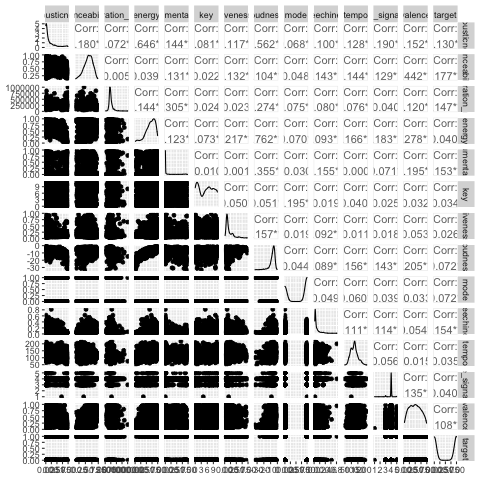

In [8]:
%%R
ggpairs(data = spotify_df_num)